In [2]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
import time

from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.visualization import array_to_latex
from qiskit_textbook.tools import random_state

#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

import warnings
warnings.filterwarnings('ignore')



In [3]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())


In [4]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [5]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [6]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [7]:
def makeVCirc(n, state):
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = state
    circ.initialize(initializedState, qr)
    return circ

In [8]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [9]:
def increment(n):
    circ = QuantumCircuit(n)
    for i in range(n-1, 0, -1):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.x(n-1)
    #removed measure & barrier
    return circ

In [10]:
def decrement(n):
    circ = QuantumCircuit(n)
    circ.x(n-1)
    for i in range(1, n):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    #removed measure and barrier
    return circ
#last section

In [11]:
def getStateVector(circ):
    return execute(circ, backend).result().get_statevector()

In [32]:
def walk(n, stateVector):
    circ = makeVCirc(n, stateVector)
    circ.h(0) #Coin Operator - Unitary Matrix of Choice
    cincrement = increment(n-1).to_gate(label=' Increment').control() #Controlled Increment, ++
    #cdecrement = decrement(n-1).to_gate(label=' Decrement').control() #Controlled Increment, ++
    circ.append(cincrement, [i for i in range(0, n)])
    circ.x(0)
    #circ.append(cdecrement, [i for i in range(0, n)])
    return circ

In [33]:
n = 4
temp_circ = makeCirc(n, '0011')
#Just Increment w/ Controlled Increment
#'011' -> 100 -> 101 -> 110 -> 111

0011


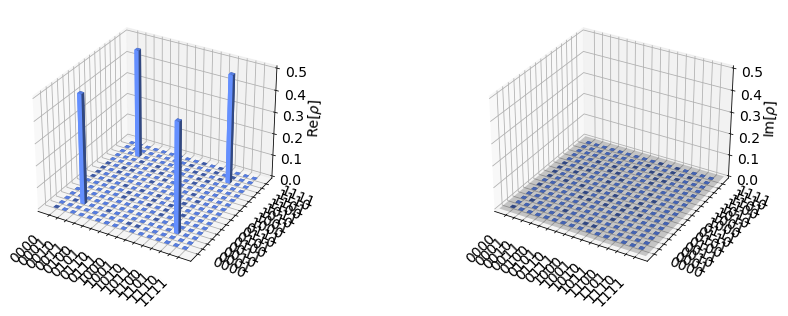

In [34]:
circ = walk(n, getStateVector(temp_circ))
display(plot_state_city(getStateVector(circ)))

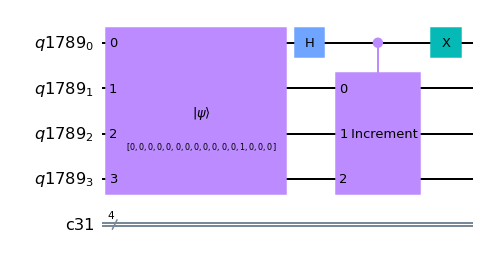

In [35]:
circ.draw('mpl', fold=-1)

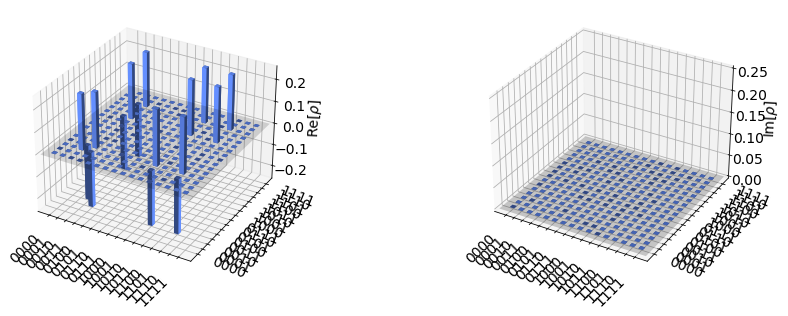

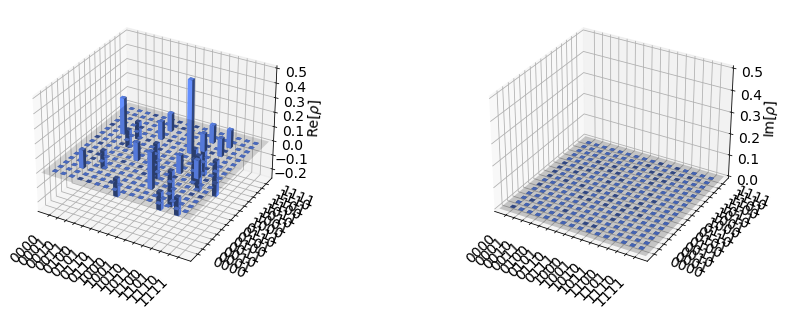

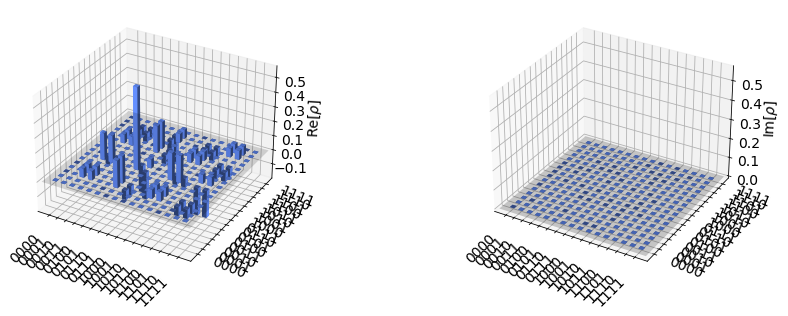

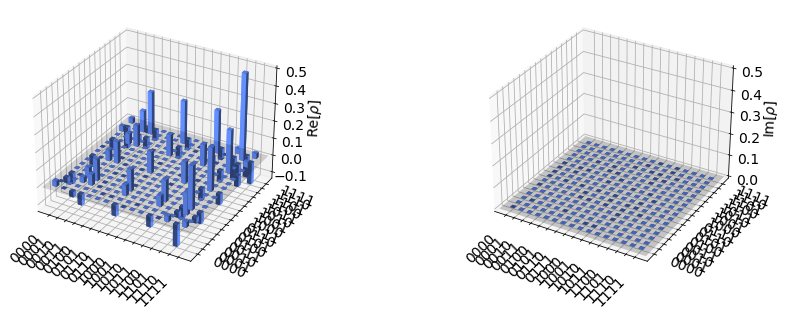

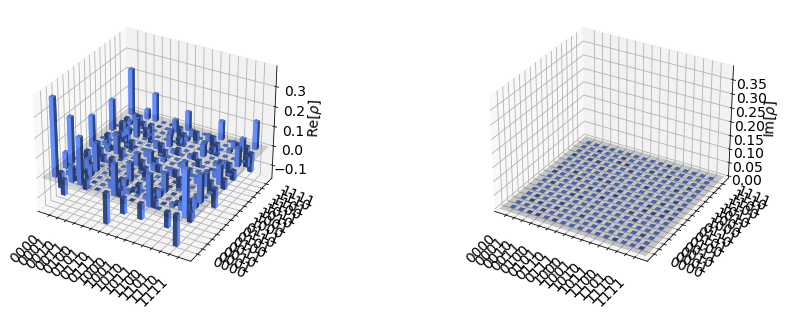

In [36]:
for i in range(5):
    circ = walk(n, getStateVector(circ))
    display(plot_state_city(getStateVector(circ)))